## Importing necessary libraries

Let's import the required packages which you will use to scrape the data from the website and visualize it with the help of seaborn, matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import re
import time
from bs4 import BeautifulSoup
import requests

## Scraping The Arabic Library Books

This URL that you are going to scrape is the following:
https://www.arab-books.com/)The page argument can be modified to access data for each page.
Hence, to access all the pages you will need to loop through all the pages to get the necessary dataset, but first, you need to find out the number of pages from the website.

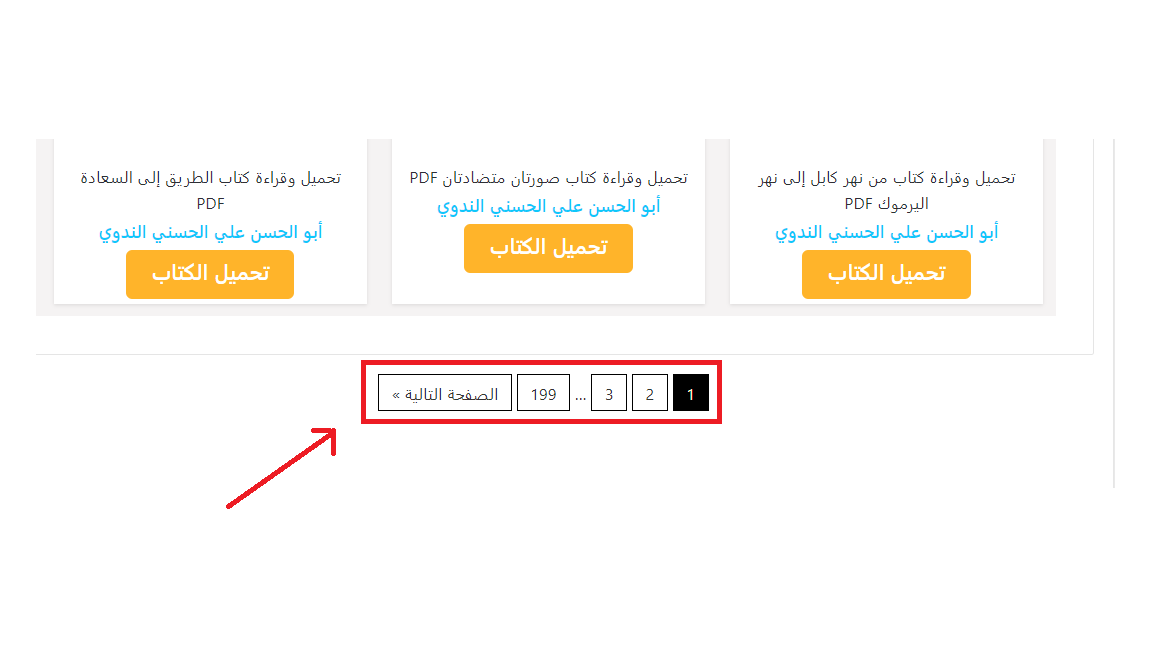

To connect to the URL and fetch the HTML content following things are required:
1. Define number of pages that contains books and number of books in each page.
2. Define empty list to store all links of books.
3. Specify the URL to requests.get
4. Extract the content from requests.get,
5. Scrape the specified page and assign it to soup variable

## Collecting the books’ URLs

In [2]:
num_of_pages = 198
num_of_books = 30
book_urls = []
for num in range(1,num_of_pages+1):
    result = requests.get(f"https://www.arab-books.com//page/{num}")
    time.sleep(1)
    src = result.content
    soup = BeautifulSoup(src, "lxml")
    all_a = soup.find_all("a", class_="post-thumb", limit=num_of_books)
    book_urls.extend([a["href"] for a in  all_a])

I used Requests and BeautifulSoup to scrape the pages, and collect the URLs of the books.
With a simple for loop it was easy to get the URLs, and save them to book_urls for later use.

### Note:
- In case you are wondering, time.sleep(1) was needed for safety reasons:<br> it stopped the code from running for 1 sec, so the scraping process didn’t overload the web server with requests.
- I used the limit parameter in findall method to restrict the number of links I get and that because every page has 30 books <br>so by doing that I will not get useful links.

In [3]:
print(len(book_urls))

5940


## Extracting data for every book

In [39]:
books = []
for book_url in book_urls:
    book = {}
    result = requests.get(book_url, allow_redirects=False)
    src = result.content
    if src == b'':
        continue
    else:
        soup = BeautifulSoup(src, "lxml")
        infos = list(soup.find("div", class_='book-info').stripped_strings)
        book["Author"] = infos[1][4:]
        book["title"] = soup.find("h1", class_="entry-title").string
        for info in infos:
            if info == 'لغة الكتاب:':
                book["language"] = infos[infos.index(info)+1]
            if info == 'عدد الصّفحات:':
                book["pages"] = infos[infos.index(info)+1]
            if info == 'دار النشر:':
                book["publishing house"] = infos[infos.index(info)+1]
            if info == 'حجم الكتاب:':
                book["size"] = infos[infos.index(info)+1]
            if info == 'ملف الكتاب:':
                book["format"] = infos[infos.index(info)+1]
            if info == 'قسم الكتاب:':
                book["category"] = infos[infos.index(info)+1][6:]
        book["url"] = book_url
        books.append(book)

In [40]:
print(len(books))

5937


Having gathered all books’ URLs, I could move on with the analysis by looping through book_urls with a for loop.
<br>For each iteration I did the same process (Specify the URL, Extract the content, Scrape the specified page) and then
<br>For every book I created a book dictionary in which I stored the following data:
- (book[“Author”], string variable)
- (book[“title”], string variable)
- (book[“langyage”], string variable)
- (book[“pages”], integer variable)
- (book[“publishing house”], string variable)
- (book[“size”], string variable)
- (book[“format”], string variable)
- (book[“category”], string variable)
- (book[“url”], string variable)

After a book dictionary was created, I added (books.append(book)) it to the books list which I’d created before.

### Note
- If there’s more than one thing inside a tag, you can still look at just the strings. These strings tend to have a lot of extra whitespace, which you can remove by using the .stripped_strings generator
- I converted stripped_strings output to list to get easy accessible to important data

## Create CSV File

In [41]:
# pass books to the DataFrame.
df = pd.DataFrame(books)

# Finally, save the dataframe as a CSV file.
df.to_csv('books_info.csv', index=False, encoding='utf-8-sig')

## Reading CSV File

In [42]:
df = pd.read_csv("books_info.csv")
df.shape

(5937, 9)

The shape of the dataframe reveals that there are 5937 rows and 9 columns in my CSV file.

In [43]:
# Let's print the first 5 rows of the dataset.
df.head()

,Author,title,category,language,pages,publishing house,size,format,url
0,أبو الحسن علي الحسني الندوي,كتاب بين الصورة والحقيقة PDF,كتب اسلامية,عربي,20 صفحة,دار ابن كثير,329.8 كيلوبايت ميغابايت,pdf,https://www.arab-books.com/books/%d9%83%d8%aa%...
1,أبو الحسن علي الحسني الندوي,كتاب إلى قمة القيادة العالمية PDF,كتب اسلامية,عربي,15 صفحة,دار ابن كثير,903.7 كيلوبايت ميغابايت,pdf,https://www.arab-books.com/books/%d9%83%d8%aa%...
2,أبو الحسن علي الحسني الندوي,كتاب مذكرات الدعوة والداعية PDF,كتب اسلامية,عربي,324 صفحة,دار ابن كثير,2.4 ميغابايت,pdf,https://www.arab-books.com/books/%d9%83%d8%aa%...
3,أبو الحسن علي الحسني الندوي,كتاب ردة ولا أبا بكر لها PDF,كتب اسلامية,عربي,28 صفحة,دار ابن كثير,338.3 كيلوبايت ميغابايت,pdf,https://www.arab-books.com/books/%d9%83%d8%aa%...
4,أبو الحسن علي الحسني الندوي,كتاب الإسلام والحكم PDF,كتب اسلامية,عربي,31 صفحة,دار ابن كثير,556.1 كيلوبايت ميغابايت,تبليغ حقوق الملكية:,https://www.arab-books.com/books/%d9%83%d8%aa%...


In [ ]:
df['pages'] = df['pages'].apply(lambda x: x.split()[0])
df['pages'] = pd.to_numeric(df['pages'])